<a href="https://colab.research.google.com/github/coddmajes/deep-learning/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U tensorflow_datasets

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as  tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.14.0


In [0]:
tf.enable_eager_execution()

In [4]:
dataset, metadata = tfds.load('fashion_mnist', shuffle_files=True, as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['T-shirt/Tops', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankie Boot']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print('Number of training examples: {}'.format(num_train_examples))
print('Number of test examples: {}'.format(num_test_examples))

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.
Number of training examples: 60000
Number of test examples: 10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

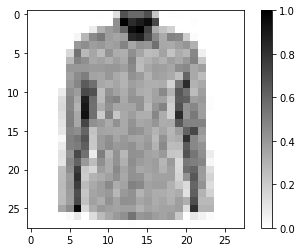

In [6]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


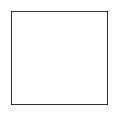

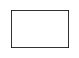

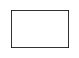

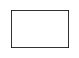

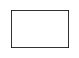

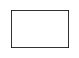

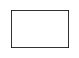

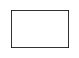

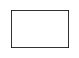

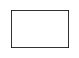

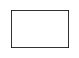

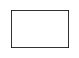

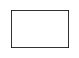

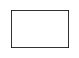

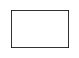

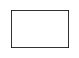

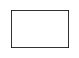

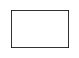

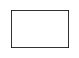

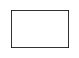

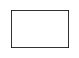

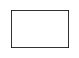

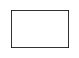

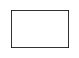

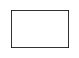

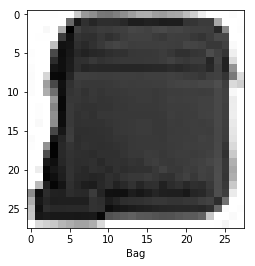

In [7]:
plt.figure(figsize=(10,10))
i =0
for(image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.figure()
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i +=1
plt.show()

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28,1)),
  tf.keras.layers.Dense(128, activation= tf.nn.relu),
  tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

In [9]:
model.compile(optimizer='adam', 
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.repeat().shuffle(num_test_examples).batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

1875/1875 [==============================] - 25s 13ms/step - loss: 0.4976 - acc: 0.8261
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3741 - acc: 0.8634
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3397 - acc: 0.8761
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3093 - acc: 0.8867
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2943 - acc: 0.8920


In [11]:
test_locc, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print('accuracy in test datasets: ' , test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.3434 - acc: 0.8795
accuracy in test datasets:  0.8794928


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  preditions = model.predict(test_images)

In [17]:
preditions.shape

(32, 10)

In [18]:
preditions[0]

array([3.3258582e-03, 1.2037139e-08, 1.5698059e-01, 1.0701930e-06,
       8.0806762e-01, 9.4423198e-11, 3.1610329e-02, 1.9333261e-10,
       1.4580708e-05, 7.0409012e-09], dtype=float32)

In [19]:
np.argmax(preditions[0])

4

In [20]:
test_labels[0]

4

In [0]:
def plot_image (i, preditions_array, true_labels. images):
  preditions_array, true_labels. images = preditions_array[i], true_labels[i]. images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)
  
  predicted_label = np.argmax(preditions_array)

  if predicted_label = true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel()